# Preliminary analysis of the telecom plans

The company Megaline offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

We are going to carry out a preliminary analysis of the plans based on a relatively small client selection. We have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. The job is to analyze clients' behavior and determine which prepaid plan brings in more revenue.

## Open the data file and study the general information

### Data

In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from scipy import stats as st

In [218]:
calls=pd.read_csv('/datasets/megaline_calls.csv')
internet=pd.read_csv('/datasets/megaline_internet.csv')
messages=pd.read_csv('/datasets/megaline_messages.csv')
plans=pd.read_csv('/datasets/megaline_plans.csv')
users=pd.read_csv('/datasets/megaline_users.csv')

In [219]:
display(calls.head(15))
print(calls.info())
print((calls['duration'] == 0).sum())

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None
26834


In [220]:
display(internet.head(15))
print(internet.info())

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [221]:
display(messages.head(15))
print(messages.info())

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [222]:
display(plans.head(15))
print(plans.info())

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [223]:
display(users.head(15))
print(users.info())

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


### Conclusion

We have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018.
Datatype of the columns that contain date will be changed accordingly.
20% of the duration values in the calls dataset is 0, which might refer to the missing calls.
Churn data in the users dataset is almost empty, probably because these users are still using megaline.

## Data preprocessing

### Calls

1. Change datatype of the dates column, add month column, since we have the data only for 2018 year
2. Round each individual call duration up to minutes according to the company policy, datatype will become integer
3. People are not charged for missing calls, therefore we can leave zeros in data as they are
4. Calculate the number of calls made and minutes used per month

In [224]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['month_calls'] = calls['call_date'].dt.month
print(calls.head(5))

         id  user_id  call_date  duration  month_calls
0   1000_93     1000 2018-12-27      8.52           12
1  1000_145     1000 2018-12-27     13.66           12
2  1000_247     1000 2018-12-27     14.48           12
3  1000_309     1000 2018-12-28      5.76           12
4  1000_380     1000 2018-12-30      4.22           12


In [225]:
calls['duration'] = calls['duration'].apply(np.ceil)
calls['duration'] =calls['duration'].astype('int')
print(calls.head(5))
print(calls.info())

         id  user_id  call_date  duration  month_calls
0   1000_93     1000 2018-12-27         9           12
1  1000_145     1000 2018-12-27        14           12
2  1000_247     1000 2018-12-27        15           12
3  1000_309     1000 2018-12-28         6           12
4  1000_380     1000 2018-12-30         5           12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
id             137735 non-null object
user_id        137735 non-null int64
call_date      137735 non-null datetime64[ns]
duration       137735 non-null int64
month_calls    137735 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 5.3+ MB
None


In [226]:
users['churn_date'] = pd.to_datetime(users['churn_date'])
users['reg_date'] = pd.to_datetime(users['reg_date'])
u = users.select_dtypes(include=['datetime'])
users[u.columns] = u.fillna(pd.to_datetime('2018-12-31'))



In [227]:

calls=calls.merge(users,how='left',on='user_id')
calls.loc[calls['call_date']>calls['churn_date'],['duration']]=0
print(calls.sample(5))

              id  user_id  call_date  duration  month_calls first_name  \
68674     1247_7     1247 2018-09-22        15            9     Marion   
133482  1483_309     1483 2018-10-22         7           10     Miguel   
37703   1141_822     1141 2018-12-15        10           12    Kirstie   
27719   1105_270     1105 2018-11-10        14           11    Micheal   
105998   1374_94     1374 2018-11-13         2           11      Ching   

        last_name  age                                       city   reg_date  \
68674   Singleton   75     Los Angeles-Long Beach-Anaheim, CA MSA 2018-04-12   
133482    Farrell   35     Chicago-Naperville-Elgin, IL-IN-WI MSA 2018-04-25   
37703      Hodges   46  New York-Newark-Jersey City, NY-NJ-PA MSA 2018-06-26   
27719       Poole   57              Providence-Warwick, RI-MA MSA 2018-01-08   
105998      Watts   55     Louisville/Jefferson County, KY-IN MSA 2018-02-14   

            plan churn_date  
68674   ultimate 2018-12-31  
133482      su

In [228]:
calls_stat=calls.pivot_table(index=('user_id','month_calls'),values='duration',aggfunc=('count','sum'))
calls_stat = pd.DataFrame(calls_stat.to_records())
calls_stat.columns=['user_id','month','calls_count','minutes_month']
print(calls_stat.head(10))
print(calls_stat.info())

   user_id  month  calls_count  minutes_month
0     1000     12           16            124
1     1001      8           27            182
2     1001      9           49            315
3     1001     10           65            393
4     1001     11           64            426
5     1001     12           56            412
6     1002     10           11             59
7     1002     11           55            386
8     1002     12           47            384
9     1003     12          149           1104
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258 entries, 0 to 2257
Data columns (total 4 columns):
user_id          2258 non-null int64
month            2258 non-null int64
calls_count      2258 non-null int64
minutes_month    2258 non-null int64
dtypes: int64(4)
memory usage: 70.7 KB
None


### Internet

1. Change datatype of the dates column, add month column, since we have the data only for 2018 year
2. Calculate the volume of data per month, round up to the GB according to the company policy, datatype will become integer

In [229]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['month'] = internet['session_date'].dt.month
print(internet.head(5))

         id  user_id session_date  mb_used  month
0   1000_13     1000   2018-12-29    89.86     12
1  1000_204     1000   2018-12-31     0.00     12
2  1000_379     1000   2018-12-28   660.40     12
3  1000_413     1000   2018-12-26   270.99     12
4  1000_442     1000   2018-12-27   880.22     12


In [230]:

internet=internet.merge(users,how='left')
internet.loc[internet['session_date']>internet['churn_date'],['mb_used']]=0
print(internet.sample(5))

             id  user_id session_date  mb_used  month first_name last_name  \
66877  1312_100     1312   2018-11-16   415.53     11       Kory   Emerson   
86753  1403_101     1403   2018-09-17   138.33      9        Jae   Gardner   
60550   1276_34     1276   2018-11-29   702.55     11     Karmen    Carney   
2617   1011_357     1011   2018-09-01   343.28      9     Halina     Henry   
49858   1223_46     1223   2018-08-09   629.87      8   Patience    Wilson   

       age                                              city   reg_date  \
66877   42                                    Fresno, CA MSA 2018-01-26   
86753   27  Washington-Arlington-Alexandria, DC-VA-MD-WV MSA 2018-02-06   
60550   20                     Phoenix-Mesa-Chandler, AZ MSA 2018-02-14   
2617    73                          Cleveland-Elyria, OH MSA 2018-01-18   
49858   37                     Phoenix-Mesa-Chandler, AZ MSA 2018-07-05   

           plan churn_date  
66877      surf 2018-12-31  
86753  ultimate 2018-1

In [231]:
internet_stat=internet.pivot_table(index=('user_id','month'),values='mb_used',aggfunc=('sum'))
internet_stat = pd.DataFrame(internet_stat.to_records())
internet_stat.columns=['user_id','month','volume_month']
internet_stat['volume_month']=internet_stat['volume_month']/1024
internet_stat['volume_month'] = internet_stat['volume_month'].apply(np.ceil)
internet_stat['volume_month'] =internet_stat['volume_month'].astype('int')
print(internet_stat.head(10))
print(internet_stat.info())

   user_id  month  volume_month
0     1000     12             2
1     1001      8             7
2     1001      9            14
3     1001     10            22
4     1001     11            19
5     1001     12            19
6     1002     10             7
7     1002     11            19
8     1002     12            15
9     1003     12            27
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 3 columns):
user_id         2277 non-null int64
month           2277 non-null int64
volume_month    2277 non-null int64
dtypes: int64(3)
memory usage: 53.5 KB
None


### Messages

1. Change datatype of the dates column, add month column, since we have the data only for 2018 year
2. Calculate the number of text messages sent per month, datatype will become integer

In [232]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages['message_month'] = messages['message_date'].dt.month
print(messages.head(5))

         id  user_id message_date  message_month
0  1000_125     1000   2018-12-27             12
1  1000_160     1000   2018-12-31             12
2  1000_223     1000   2018-12-31             12
3  1000_251     1000   2018-12-27             12
4  1000_255     1000   2018-12-26             12


In [233]:
messages=messages.merge(users,how='left')
messages=messages[messages['message_date']<messages['churn_date']]
print(messages.sample(5))

             id  user_id message_date  message_month first_name   last_name  \
45703  1312_187     1312   2018-09-26              9       Kory     Emerson   
40647  1261_302     1261   2018-07-28              7      Dusti      Forbes   
31162   1195_29     1195   2018-10-25             10        Roy       Velez   
31813  1196_299     1196   2018-08-11              8       Noel      Dawson   
20588  1130_263     1130   2018-11-24             11   Clarence  Cunningham   

       age                                             city   reg_date  \
45703   42                                   Fresno, CA MSA 2018-01-26   
40647   31                           Kansas City, MO-KS MSA 2018-02-22   
31162   60          Portland-Vancouver-Hillsboro, OR-WA MSA 2018-06-09   
31813   46           Los Angeles-Long Beach-Anaheim, CA MSA 2018-01-14   
20588   27  Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA 2018-05-17   

           plan churn_date  
45703      surf 2018-12-31  
40647      surf 2018-1

In [234]:
messages_stat=messages.pivot_table(index=('user_id','message_month'),values='id',aggfunc=('count'))
messages_stat = pd.DataFrame(messages_stat.to_records())
messages_stat.columns=['user_id','month','messages_month']
print(messages_stat.head(10))
print(messages_stat.info())

   user_id  month  messages_month
0     1000     12               8
1     1001      8              30
2     1001      9              44
3     1001     10              53
4     1001     11              36
5     1001     12              44
6     1002     10              15
7     1002     11              32
8     1002     12              38
9     1003     12              48
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 3 columns):
user_id           1775 non-null int64
month             1775 non-null int64
messages_month    1775 non-null int64
dtypes: int64(3)
memory usage: 41.7 KB
None


### Monthly revenue

#### Combine all data into one table

Using merge method we will combine all data of the plan usage that we have. We will use 'outer' method based on user id and month columns. That will allow us to see all type of activities each user had.

In [235]:
new_stat=calls_stat.merge(internet_stat,how='outer')
new_stat=new_stat.merge(messages_stat,how='outer')
new_stat['calls_count']=new_stat['calls_count'].fillna(0)
new_stat['minutes_month']=new_stat['minutes_month'].fillna(0)
new_stat['volume_month']=new_stat['volume_month'].fillna(0)
new_stat['messages_month']=new_stat['messages_month'].fillna(0)
new_stat['calls_count'] =new_stat['calls_count'].astype('int')
new_stat['minutes_month'] =new_stat['minutes_month'].astype('int')
new_stat['volume_month'] =new_stat['volume_month'].astype('int')
new_stat['messages_month'] =new_stat['messages_month'].astype('int')
print(new_stat.info())
print(new_stat.sample(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 6 columns):
user_id           2293 non-null int64
month             2293 non-null int64
calls_count       2293 non-null int64
minutes_month     2293 non-null int64
volume_month      2293 non-null int64
messages_month    2293 non-null int64
dtypes: int64(6)
memory usage: 125.4 KB
None
      user_id  month  calls_count  minutes_month  volume_month  messages_month
197      1049      6           46            341             9               0
1525     1336     10          117            728            19              78
733      1157      7           46            313             7               0
25       1007     12           87            617            29              49
1194     1258     10           12            117            18              55
1849     1403     11           35            220            25               0
1535     1339      5            2             25             4      

#### Add users' and plan info

In [236]:
users['month_amount'] = users['churn_date'].dt.month - users['reg_date'].dt.month+1
#users=pd.DataFrame(users.values.repeat(users.month_amount, axis=0), columns=users.columns)
users['reg_month']=users['reg_date'].dt.month
users['churn_month']=users['churn_date'].dt.month
users['reg_month'] =users['reg_month'].astype('int')
users['churn_month'] =users['churn_month'].astype('int')
users_ids=users['user_id'].unique()
users


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month_amount,reg_month,churn_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,1,12,12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,5,8,12
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31,3,10,12
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31,12,1,12
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31,8,5,12
...,...,...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,2018-12-31,4,9,12
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,2018-12-31,11,2,12
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,2018-12-31,1,12,12
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2018-12-31,11,2,12


In [237]:
dmf=pd.DataFrame(users_ids)
dmf.set_axis(['user_id'],axis = 'columns', inplace=True)
dmf=pd.DataFrame(dmf.values.repeat(12, axis=0), columns=dmf.columns)

from itertools import cycle

mnth = cycle([1,2,3,4,5,6,7,8,9,10,11,12])
dmf['month'] = [next(mnth) for m in range(len(dmf))]

new_users=dmf.merge(users,how='outer')

new_users.reset_index(drop=True, inplace=True)

new_users=new_users[new_users['month']<=new_users['churn_month']]
new_users=new_users[new_users['month']>=new_users['reg_month']]
print(new_users.tail(15))
print(new_users.info())

      user_id  month first_name   last_name  age  \
5981     1498      6       Scot  Williamson   51   
5982     1498      7       Scot  Williamson   51   
5983     1498      8       Scot  Williamson   51   
5984     1498      9       Scot  Williamson   51   
5985     1498     10       Scot  Williamson   51   
5986     1498     11       Scot  Williamson   51   
5987     1498     12       Scot  Williamson   51   
5992     1499      5      Shena     Dickson   37   
5993     1499      6      Shena     Dickson   37   
5994     1499      7      Shena     Dickson   37   
5995     1499      8      Shena     Dickson   37   
5996     1499      9      Shena     Dickson   37   
5997     1499     10      Shena     Dickson   37   
5998     1499     11      Shena     Dickson   37   
5999     1499     12      Shena     Dickson   37   

                                           city   reg_date  plan churn_date  \
5981  New York-Newark-Jersey City, NY-NJ-PA MSA 2018-02-04  surf 2018-12-31   
5982  New

For user dataframe I've added the month column, so now we have each user repeated the exact amount of months they used the plan. When the didn't use their phones i've put 0 values accordingly to minutes, messages and internet usage columns. So than now the month pay is counted in the revenue.
The NA in churn date was replaced with 31.12.2018 since we have data only for one year.

In [238]:
new_users=new_users.drop(['first_name','last_name','age','reg_date','churn_date','month_amount','reg_month','churn_month'],axis = 1)
new_users.columns=['user_id','month','city','plan_name']
new_users=new_users.merge(plans,how='left')
print(new_users.head(10))
print(new_users.info())

   user_id  month                                   city plan_name  \
0     1000     12  Atlanta-Sandy Springs-Roswell, GA MSA  ultimate   
1     1001      8        Seattle-Tacoma-Bellevue, WA MSA      surf   
2     1001      9        Seattle-Tacoma-Bellevue, WA MSA      surf   
3     1001     10        Seattle-Tacoma-Bellevue, WA MSA      surf   
4     1001     11        Seattle-Tacoma-Bellevue, WA MSA      surf   
5     1001     12        Seattle-Tacoma-Bellevue, WA MSA      surf   
6     1002     10   Las Vegas-Henderson-Paradise, NV MSA      surf   
7     1002     11   Las Vegas-Henderson-Paradise, NV MSA      surf   
8     1002     12   Las Vegas-Henderson-Paradise, NV MSA      surf   
9     1003      1                          Tulsa, OK MSA      surf   

   messages_included  mb_per_month_included  minutes_included  \
0               1000                  30720              3000   
1                 50                  15360               500   
2                 50              

In [239]:
#this time we are using method "on left", since some users are missing information about their activity(no more thAn 2%):
new_stat=new_users.merge(new_stat,how='left')
new_stat = new_stat.fillna(0)
print(new_stat.info())
print(new_stat.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3313 entries, 0 to 3312
Data columns (total 15 columns):
user_id                  3313 non-null int64
month                    3313 non-null int64
city                     3313 non-null object
plan_name                3313 non-null object
messages_included        3313 non-null int64
mb_per_month_included    3313 non-null int64
minutes_included         3313 non-null int64
usd_monthly_pay          3313 non-null int64
usd_per_gb               3313 non-null int64
usd_per_message          3313 non-null float64
usd_per_minute           3313 non-null float64
calls_count              3313 non-null float64
minutes_month            3313 non-null float64
volume_month             3313 non-null float64
messages_month           3313 non-null float64
dtypes: float64(6), int64(7), object(2)
memory usage: 414.1+ KB
None
   user_id  month                                   city plan_name  \
0     1000     12  Atlanta-Sandy Springs-Roswell, GA MSA  ultimat

#### Calculate

Calculate the monthly revenue from each user:
 - subtract the free package limit from the total number of calls, text messages, and data;
 - multiply the result by the calling plan value;
 - add the monthly charge depending on the calling plan

In [240]:
def revenue_calc(row):
    revenue = row['usd_monthly_pay']
    if row['minutes_month']>row['minutes_included']:
        revenue+=(row['minutes_month'] - row['minutes_included']) * row['usd_per_minute']
        
    if row['messages_month'] > row['messages_included']:
        revenue += (row['messages_month'] - row['messages_included']) * row['usd_per_message']
   
    if row['volume_month'] > (row['mb_per_month_included']/1024):
        revenue += (row['volume_month'] - (row['mb_per_month_included']/1024)) * row['usd_per_gb']
    return revenue

new_stat['revenue'] = new_stat.apply(revenue_calc, axis=1)
display(new_stat.sample(10))
print(new_stat.info())

,user_id,month,city,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,calls_count,minutes_month,volume_month,messages_month,revenue
1413,1216,8,"San Francisco-Oakland-Berkeley, CA MSA",surf,50,15360,500,20,10,0.03,0.03,0.0,0.0,0.0,0.0,20.00
782,1120,10,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,15360,500,20,10,0.03,0.03,58.0,394.0,18.0,43.0,50.00
1810,1270,11,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,42.0,256.0,16.0,32.0,70.00
2308,1347,10,"Charleston-North Charleston, SC MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,54.0,420.0,22.0,73.0,70.00
991,1151,6,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,15360,500,20,10,0.03,0.03,0.0,0.0,0.0,0.0,20.00
1197,1183,12,"Chicago-Naperville-Elgin, IL-IN-WI MSA",surf,50,15360,500,20,10,0.03,0.03,96.0,596.0,21.0,95.0,84.23
2282,1342,12,"Indianapolis-Carmel-Anderson, IN MSA",surf,50,15360,500,20,10,0.03,0.03,65.0,519.0,11.0,7.0,20.57
3255,1492,9,"Portland-Vancouver-Hillsboro, OR-WA MSA",surf,50,15360,500,20,10,0.03,0.03,15.0,33.0,4.0,11.0,20.00
2183,1328,10,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",surf,50,15360,500,20,10,0.03,0.03,115.0,819.0,28.0,157.0,162.78
1704,1255,11,"Oklahoma City, OK MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,79.0,646.0,8.0,49.0,70.00


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3313 entries, 0 to 3312
Data columns (total 16 columns):
user_id                  3313 non-null int64
month                    3313 non-null int64
city                     3313 non-null object
plan_name                3313 non-null object
messages_included        3313 non-null int64
mb_per_month_included    3313 non-null int64
minutes_included         3313 non-null int64
usd_monthly_pay          3313 non-null int64
usd_per_gb               3313 non-null int64
usd_per_message          3313 non-null float64
usd_per_minute           3313 non-null float64
calls_count              3313 non-null float64
minutes_month            3313 non-null float64
volume_month             3313 non-null float64
messages_month           3313 non-null float64
revenue                  3313 non-null float64
dtypes: float64(7), int64(7), object(2)
memory usage: 440.0+ KB
None


### Conclusion

Data was converted to the necessary types. Data was changed and preprocessed according to the telecom plans. Zero values were left as they are since they are the natural part of the plan usage. The number of calls, minutes, messages, data volume were calculated for each user per month and merged into one dataset. Based on the obtained data the monthly revenue from each user was written in. 

## Analyze the data

1. Check the data for the outliers and filter it if needed
2. Find how much the users of each plan require per month
3. Calculate the mean, dispersion, and standard deviation
3. Plot histogtams
4. Find what part of usage exceeds the package limits

### Calls

count    3313.000000
mean      290.634168
std       279.200830
min         0.000000
25%         0.000000
50%       273.000000
75%       493.000000
max      1510.000000
Name: minutes_month, dtype: float64


(0, 1250)

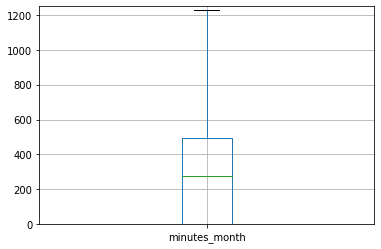

In [262]:
print(new_stat['minutes_month'].describe())
new_stat.boxplot(column='minutes_month')
plt.ylim(0,1250)

In [263]:
calls_filt=new_stat.query('minutes_month<=1250')

#### Surf

In [264]:
calls_plan_s=calls_filt.loc[(calls_filt['plan_name'] == 'surf')].groupby('user_id')['minutes_month'].agg('mean')
#print(calls_plan_s.head(10))
print(calls_plan_s.describe())
print('Dispersion:', round(np.var(calls_plan_s)))

count     339.000000
mean      302.553335
std       202.822709
min         0.000000
25%       131.483333
50%       291.000000
75%       441.458333
max      1023.875000
Name: minutes_month, dtype: float64
Dispersion: 41016


0.168141592920354


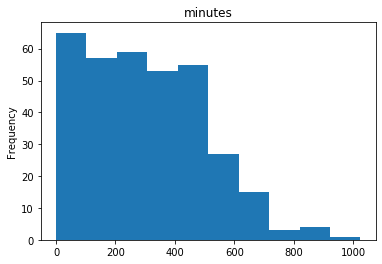

In [265]:
calls_plan_s.plot(kind='hist', title='minutes')
print(len(calls_plan_s.loc[calls_plan_s>500])/len(calls_plan_s))

#### Ultimate

In [266]:
calls_plan_u=calls_filt.loc[(calls_filt['plan_name'] == 'ultimate')].groupby('user_id')['minutes_month'].agg('mean')
#print(calls_plan_u.head(10))
print(calls_plan_u.describe())
print('Dispersion:', round(np.var(calls_plan_u)))

count    161.000000
mean     287.006530
std      217.186499
min        0.000000
25%      114.000000
50%      238.000000
75%      439.600000
max      959.000000
Name: minutes_month, dtype: float64
Dispersion: 46877


0.0


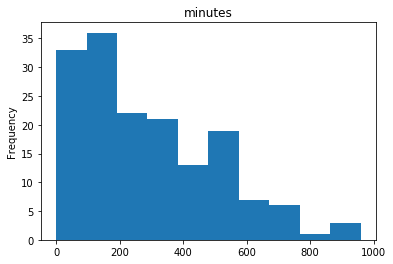

In [267]:
calls_plan_u.plot(kind='hist', title='minutes')
print(len(calls_plan_u.loc[calls_plan_u>3000])/len(calls_plan_u))

#### Conclusion

1. More people use surf plan than ultimate
2. Mean values of minutes for both groups are very close to each other.
3. Around 17 % of surf users exceed the usage of the minutes, meanwhile ultimate plan users never come even close to the upper limit for the minutes usage. Therefore it might be better to correct the limits or add another plan thad would lie in between.

### Internet

(0, 48)

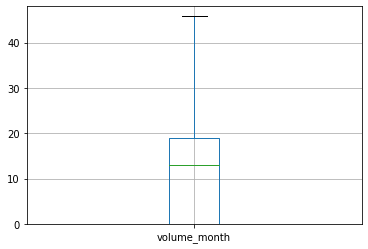

In [269]:
new_stat.boxplot(column='volume_month')
plt.ylim(0,48)

#### Surf

In [270]:
int_filt=new_stat.query('volume_month<=48')
int_plan_s=int_filt.loc[(int_filt['plan_name'] == 'surf')].groupby('user_id')['volume_month'].agg('mean')
#print(int_plan_s.head(10))
print(int_plan_s.describe())
print('Dispersion:', round(np.var(int_plan_s)))

count    339.000000
mean      11.536233
std        6.608195
min        0.000000
25%        6.257576
50%       11.833333
75%       16.250000
max       29.800000
Name: volume_month, dtype: float64
Dispersion: 44


0.3274336283185841


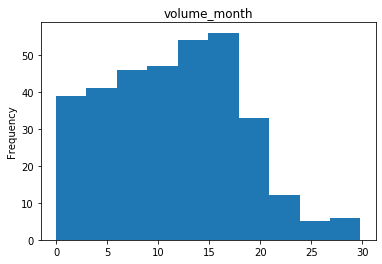

In [271]:
int_plan_s.plot(kind='hist', title='volume_month')
print(len(int_plan_s.loc[int_plan_s>15])/len(int_plan_s))

#### Ultimate

count    161.000000
mean      11.332453
std        6.922572
min        0.000000
25%        6.000000
50%       11.454545
75%       15.750000
max       35.090909
Name: volume_month, dtype: float64
Dispersion: 48
0.012422360248447204


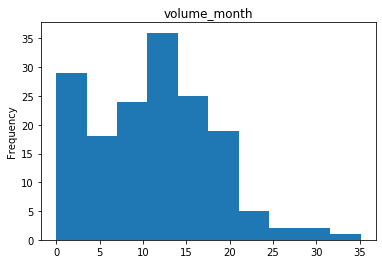

In [272]:
int_plan_u=int_filt.loc[(int_filt['plan_name'] == 'ultimate')].groupby('user_id')['volume_month'].agg('mean')
#print(int_plan_u.head(10))
print(int_plan_u.describe())
print('Dispersion:', round(np.var(int_plan_u)))
int_plan_u.plot(kind='hist', title='volume_month')
print(len(int_plan_u.loc[int_plan_u>30])/len(int_plan_u))

#### Conclusion

1. Mean values for both plans are close to each other
2. The distribution of the values for ultimate plan users are slightly shifted to the right
3. All values nevertheless for both plans normally distributed around the mean
4. 32% of the surf users exceed the data volume limit, this plan requires corrections.
5. Ultimate plan seems to be the most balanced and convenient for users in case of internet usage.

### Messages

(0, 92)

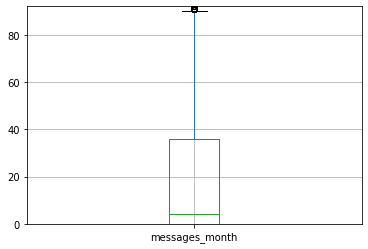

In [276]:
new_stat.boxplot(column='messages_month')
plt.ylim(0,92)

In [277]:
msg_filt=new_stat.query('messages_month<=92')

#### Surf

In [278]:
msg_plan_s=msg_filt.loc[(msg_filt['plan_name'] == 'surf')].groupby('user_id')['messages_month'].agg('mean')
#print(msg_plan_s.head(10))
print(msg_plan_s.describe())
print('Dispersion:', round(np.var(msg_plan_s)))

count    336.000000
mean      19.203072
std       19.776968
min        0.000000
25%        2.000000
50%       13.937500
75%       29.500000
max       91.000000
Name: messages_month, dtype: float64
Dispersion: 390


0.07738095238095238


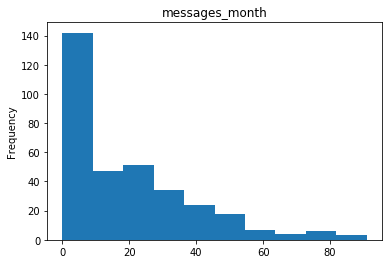

In [279]:
msg_plan_s.plot(kind='hist', title='messages_month')
print(len(msg_plan_s.loc[msg_plan_s>50])/len(msg_plan_s))

#### Ultimate

count    160.000000
mean      21.769350
std       22.130910
min        0.000000
25%        2.172619
50%       13.625000
75%       37.727273
max       78.833333
Name: messages_month, dtype: float64
Dispersion: 487
0.0


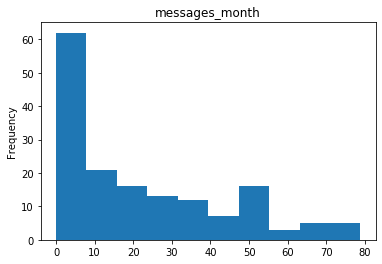

In [280]:
msg_plan_u=msg_filt.loc[(msg_filt['plan_name'] == 'ultimate')].groupby('user_id')['messages_month'].agg('mean')
#print(msg_plan_u.head(10))
print(msg_plan_u.describe())
print('Dispersion:', round(np.var(msg_plan_u)))
msg_plan_u.plot(kind='hist', title='messages_month')
print(len(msg_plan_u.loc[msg_plan_u>1000])/len(msg_plan_u))

#### Conclusion

1. Mean values for both plans are close to each other
2. The distribution of the values for ultimate plan users are slightly shifted to the right compared to surf
3. It seems that values don't have normal distribution for both plans. It might be that messages are not popular nowadays or that we don't have enough data. It can be worth investigating if the usage of the messages depends on the age of the user, or area (bad reception e.g.).
4. 7% of the surf users exceed the limit, and taking into account previous point, this plan requires corrections for certain group of people. (additional messages if you are older than 60 e.g.)
5. Ultimate plan offers too many messages people don't usually use.

### Conclusion

- The data was analyzed, the minutes, texts, and volume of data the users of each plan require per month were found, we calculated the mean, dispersion, and standard deviation.
- We can tell that a significant amount of the surf users exceed the limits of the plan, and overpay. The ultimate users rarely exceed the limit, some limits are too large. But nevertheless more people use surf, therefore the ultimate is too expensive and offers too much. Perhaps it is required to create a new plan and promote it. The plan that would satisfy the users' needs by offering a little more than surf plan and at the same time slightly less expensive than the ultimate.

## Hypotheses

### Revenue based on plans

Hypothesis:
 - The average revenue from users of Ultimate and Surf calling plans differs.

* Null hypothesis H₀: The mean revenue from users of Ultimate and Surf calling plans are the same.
* The alternative hypothesis, H₁, is based on H₀: For this H₀, H₁ would be, “The average revenue from users of Ultimate and Surf calling plans differs".
* Calculate the T-test for the means of two independent samples of scores. This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values.
* Critical statistical significance is taken as 5%.

In [256]:

rev_s=new_stat.loc[(new_stat['plan_name'] == 'surf')].groupby('user_id')['revenue'].agg('mean')
rev_u=new_stat.loc[(new_stat['plan_name'] == 'ultimate')].groupby('user_id')['revenue'].agg('mean')
alpha =0.05
results = st.ttest_ind(rev_s, rev_u)
print('p-value:', results.pvalue)


if results.pvalue < alpha:
    print("We  reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 3.4880587031159416e-20
We  reject the null hypothesis


### Revenue based on area

Hypothesis:
- The average revenue from users in NY-NJ area is different from that of the users from other regions.

* Null hypothesis H₀: The mean revenue from users in NY-NJ area is the same as from that of the users from other regions.
* The alternative hypothesis, H₁, is based on H₀: For this H₀, H₁ would be, “The mean revenue from users in NY-NJ area is  different from that of the users from other regions".
* Calculate the T-test for the means of two independent samples of scores. This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values.
* Critical statistical significance is taken as 5%.

In [257]:
rev_ny=new_stat.loc[(new_stat['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA')].groupby('user_id')['revenue'].agg('mean')
rev_other=new_stat.loc[(new_stat['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA')].groupby('user_id')['revenue'].agg('mean')
alpha =0.05
results = st.ttest_ind(rev_ny, rev_other)
print('p-value:', results.pvalue)


if results.pvalue < alpha:
    print("We  reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.6083266012987438
We can't reject the null hypothesis


### Conclusion

1. The first hypothesis that the average revenue from users of Ultimate and Surf calling plans differs wasn't rejected. Therefore it can be that the average revenue differs depending on the plan
2. The second hypothesis was rejected. The users from New York can have the same mean revenue as the users from other cities.

## Overall conclusion

In this project, we obtained the data for 500 users of two telecom plans. The data was preprocessed, all the calculations required for the research were performed. We analyzed users' behaviour. Based on our conclusions we can suggest rethinking the surf plan or creating a new more balanced plan. According to the two hypotheses we had, we can say that the average revenue from users of Ultimate and Surf calling plans differs, and average revenue is not affected by whether the user lives in New York or not.